# Training on train dataset (Fashion MNIST)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.models import resnet18
import torch.backends.cudnn as cudnn

# Step 1: Load FashionMNIST dataset using PyTorch
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert single channel to three channels
    transforms.Resize((224, 224)),  # Resize to match ResNet18 input size
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Step 2: Load the untrained architecture of ResNet18 model
model = resnet18(pretrained=False, num_classes=10)  # FashionMNIST has 10 classes

# Step 3: Train the model from scratch on the FashionMNIST dataset train set
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

cudnn.benchmark = True  # For faster training on CUDA

num_epochs = 5  # Adjust as needed

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# Step 4: Evaluate on the test set and get the accuracy
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Step 5: Save the model checkpoints
checkpoint_path = 'resnet18_fashionmnist.pth'
torch.save(model.state_dict(), checkpoint_path)
print(f'Model checkpoints saved to {checkpoint_path}')


Epoch 1/5, Loss: 0.30231574177742004
Epoch 2/5, Loss: 0.455803781747818
Epoch 3/5, Loss: 0.1995808333158493
Epoch 4/5, Loss: 0.15916834771633148
Epoch 5/5, Loss: 0.172371968626976
Test Accuracy: 90.16%
Model checkpoints saved to resnet18_fashionmnist.pth


# Imports

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.models import resnet18
import torch.backends.cudnn as cudnn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Dataset

In [ ]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert single channel to three channels
    transforms.Resize((224, 224)),  # Resize to match ResNet18 input size
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 26421880/26421880 [00:02<00:00, 12626621.76it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 210915.02it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3904219.75it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5415670.18it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



# Function to load a model from root directory

In [ ]:
from torchvision.models import resnet18

def load_model(model_path, model=resnet18(num_classes=10)):
  model.load_state_dict(torch.load(model_path))
  return model


# Function for Evaluation on a dataset

In [ ]:
def eval_dataset(dataloader, model, print_output="Accuracy"):
  correct = 0
  total = 0

  with torch.no_grad():
      for inputs, labels in dataloader:
          inputs, labels = inputs.to(device), labels.to(device)
          outputs = model(inputs)
          _, predicted = torch.max(outputs, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  accuracy = correct / total

  print(f'{print_output}: {accuracy * 100:.2f}%')

In [ ]:
model = load_model(model_path='/content/resnet18_fashionmnist.pth')
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
eval_dataset(train_loader, model)

Train Accuracy: 92.45%


# Analyze data and predictions

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_class_histogram(dataloader):
    class_counts = {i: 0 for i in range(10)}  # Assuming there are 10 classes in FashionMNIST

    # Iterate through the DataLoader to count occurrences of each class
    for _, labels in dataloader:
        for label in labels.numpy():
            class_counts[label] += 1

    # Plot the histogram
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.bar(classes, counts, align='center', alpha=0.7)
    plt.xlabel('Class Label')
    plt.ylabel('Number of Instances')
    plt.title('Class Label Histogram')
    plt.show()

# Example usage with forget_dataset DataLoader
# plot_class_histogram(forget_dataset)


# Create Retain and Forget Set

In [ ]:
forget_indices = []
retain_indices = []
forget_class = 0

# Iterate through the dataset and separate indices based on the forget_class
for i in range(len(train_dataset)):
    _, label = train_dataset[i]
    if label == forget_class and len(forget_indices) < (len(train_dataset)/10) // 2:
        forget_indices.append(i)
    else:
        retain_indices.append(i)

# Create DataLoader for forget and retain datasets
forget_sampler = torch.utils.data.sampler.SubsetRandomSampler(forget_indices)
retain_sampler = torch.utils.data.sampler.SubsetRandomSampler(retain_indices)

forget_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, sampler=forget_sampler)
retain_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, sampler=retain_sampler)


In [ ]:
# loading retain and forget loader

forget_loader = torch.load('/content/forget_loader.pth')
retain_loader = torch.load('/content/retain_loader.pth')

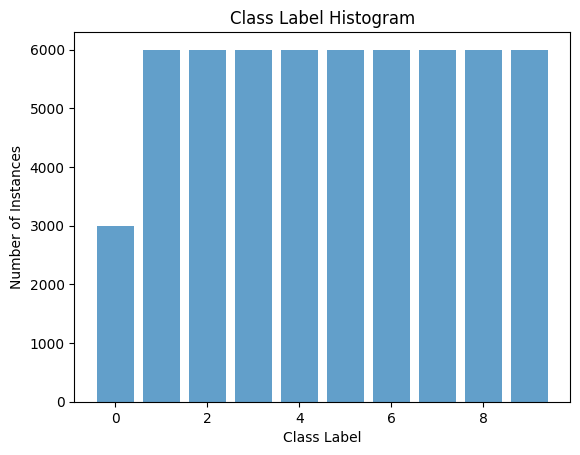

In [ ]:
plot_class_histogram(retain_loader)

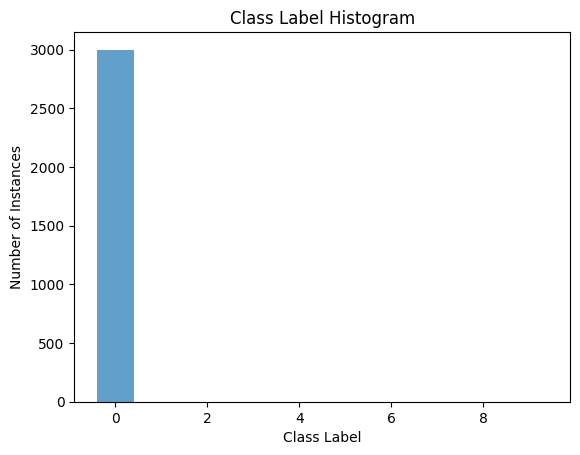

In [ ]:
plot_class_histogram(forget_loader)

In [ ]:
# Save retain_dataset and forget_dataset
torch.save(retain_loader, '/content/data/FashionMNIST/retain_loader.pth')
torch.save(forget_loader, '/content/data/FashionMNIST/forget_loader.pth')

# Create 2nd Retain and Forget set with all of class 0 to be forgotten

In [ ]:
forget_indices = []
retain_indices = []
forget_class = 0

# Iterate through the dataset and separate indices based on the forget_class
for i in range(len(train_dataset)):
    _, label = train_dataset[i]
    if label == forget_class:
        forget_indices.append(i)
    else:
        retain_indices.append(i)

# Create DataLoader for forget and retain datasets
forget_sampler_fullclass = torch.utils.data.sampler.SubsetRandomSampler(forget_indices)
retain_sampler_fullclass = torch.utils.data.sampler.SubsetRandomSampler(retain_indices)

forget_loader_fullclass = torch.utils.data.DataLoader(train_dataset, batch_size=64, sampler=forget_sampler_fullclass)
retain_loader_fullclass = torch.utils.data.DataLoader(train_dataset, batch_size=64, sampler=retain_sampler_fullclass)


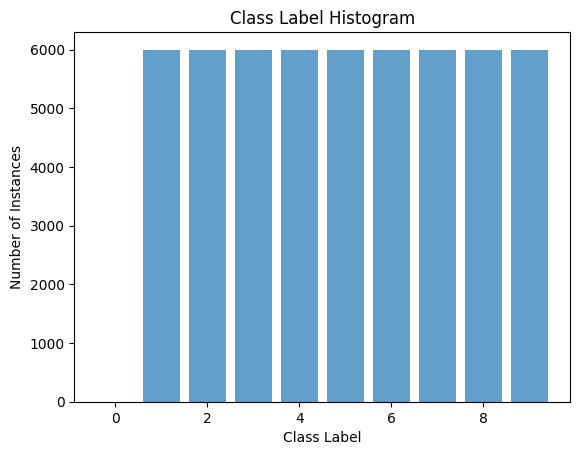

In [ ]:
plot_class_histogram(retain_loader_fullclass)

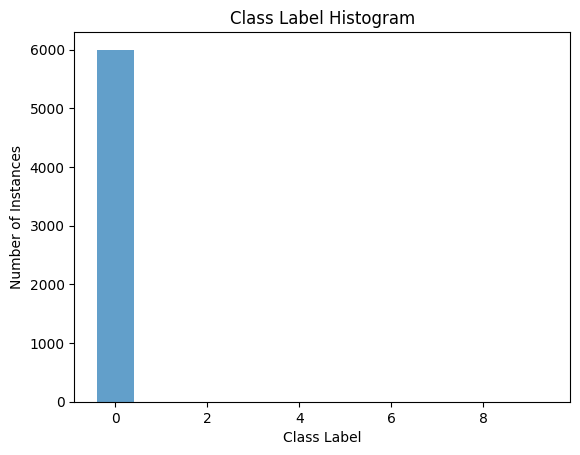

In [ ]:
plot_class_histogram(forget_loader_fullclass)

In [ ]:
# Save retain_dataset and forget_dataset
torch.save(retain_loader_fullclass, '/content/data/FashionMNIST/retain_loader_fullclass.pth')
torch.save(forget_loader_fullclass, '/content/data/FashionMNIST/forget_loader_fullclass.pth')

In [ ]:
train_dataset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
def plot_prediction_histogram(true_labels, predicted_labels, num_classes):
    plt.figure(figsize=(10, 6))
    bins = np.arange(num_classes + 1) - 0.5
    plt.hist([true_labels, predicted_labels], bins=bins, color=['blue', 'orange'], alpha=0.7, label=['True Labels', 'Predicted Labels'])
    plt.xticks(range(num_classes))
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('True vs Predicted Class Labels Histogram')
    plt.legend()
    plt.show()


# Step 1: Finetuning after resetting fc layer

### Small forget class

Model checkpoint saved at epoch 1: /content/1_finetuning_checkpoints/finetune_model_epoch_1.pth


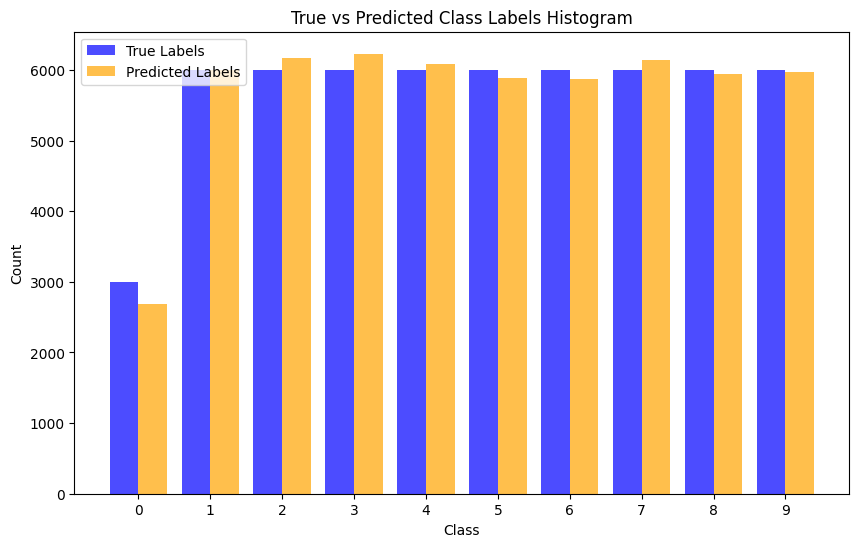

Forget Set Accuracy: 63.93%


Model checkpoint saved at epoch 2: /content/1_finetuning_checkpoints/finetune_model_epoch_2.pth


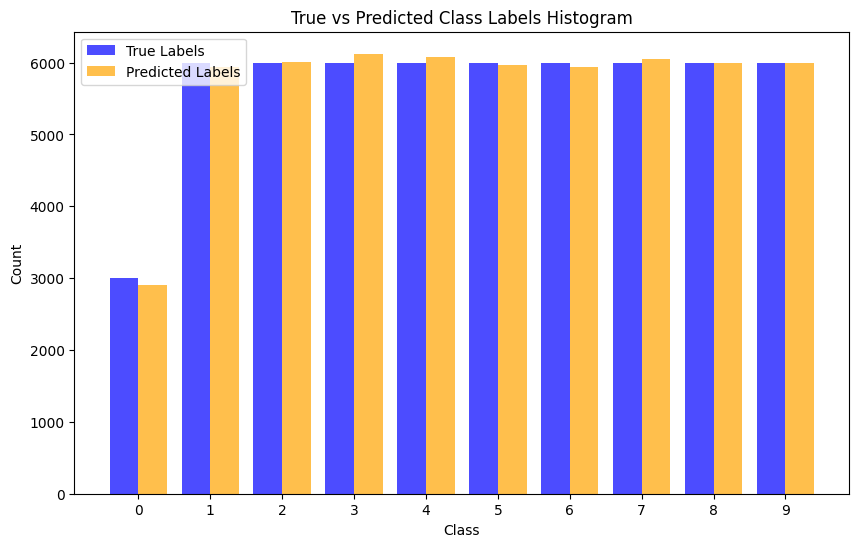

Forget Set Accuracy: 85.30%


In [ ]:
from torch.utils.data import random_split
from tqdm import tqdm

num_classes = 10


finetune_model = resnet18(pretrained=False)
finetune_model.fc = nn.Linear(finetune_model.fc.in_features, num_classes)
# Load the pretrained checkpoint and replace the weights of the new model
finetune_model.load_state_dict(model.state_dict())

# Replace the last fully connected layer with a new one
finetune_model.fc.reset_parameters()
# finetune_model.fc = nn.Linear(finetune_model.fc.in_features, num_classes)


# Fine-tune the model on the "retain" set
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(finetune_model.parameters(), lr=0.001, momentum=0.9)
finetune_model.to(device)

cudnn.benchmark = True  # For faster training on CUDA

num_epochs = 2  # Adjust as needed

for epoch in range(num_epochs):
    finetune_model.train()
    progress_bar = tqdm(retain_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False)

    true_labels_list = []
    predicted_labels_list = []

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = finetune_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        predicted_labels = torch.argmax(outputs, dim=1)
        true_labels_list.extend(labels.cpu().numpy())
        predicted_labels_list.extend(predicted_labels.cpu().numpy())

        progress_bar.set_postfix({'Loss': loss.item()})

    if (epoch + 1) % 1 == 0:
        checkpoint_path = f'/content/1_finetuning_checkpoints/finetune_model_epoch_{epoch+1}.pth'
        torch.save(finetune_model.state_dict(), checkpoint_path)
        print(f'Model checkpoint saved at epoch {epoch+1}: {checkpoint_path}')

        true_labels_array = np.array(true_labels_list)
        predicted_labels_array = np.array(predicted_labels_list)
        plot_prediction_histogram(true_labels_array, predicted_labels_array, num_classes)

        # Evaluate the finetuned model on the "forget" set
        finetune_model.eval()
        eval_dataset(forget_loader, finetune_model, "Forget Set Accuracy")



In [ ]:
print("Forget Set Accuracy before 1st step of finetuning")
eval_dataset(forget_loader, model, "Forget Set Accuracy")

Forget Set Accuracy before 1st step of finetuning
Forget Set Accuracy: 37.43%


In [ ]:
print("Retain Set Accuracy before 1st step of finetuning")
eval_dataset(retain_loader, model, "Retain Set Accuracy")

Retain Set Accuracy before 1st step of finetuning
Retain Set Accuracy: 93.12%


In [ ]:
print("Retain Set Accuracy after 2 epochs of finetuning")
eval_dataset(retain_loader, finetune_model, "Retain Set Accuracy")

Retain Set Accuracy after 2 epochs of finetuning
Retain Set Accuracy: 94.09%


### Full forget class

In [ ]:
from torch.utils.data import random_split
from tqdm import tqdm

num_classes = 10


finetune_model_fullclass = resnet18(pretrained=False)
finetune_model_fullclass.fc = nn.Linear(finetune_model_fullclass.fc.in_features, num_classes)
# Load the pretrained checkpoint and replace the weights of the new model
finetune_model_fullclass.load_state_dict(model.state_dict())

# Replace the last fully connected layer with a new one
finetune_model_fullclass.fc = nn.Linear(finetune_model_fullclass.fc.in_features, num_classes)


# Fine-tune the model on the "retain" set
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(finetune_model_fullclass.parameters(), lr=0.001, momentum=0.9)
finetune_model_fullclass.to(device)

cudnn.benchmark = True  # For faster training on CUDA

num_epochs = 2  # Adjust as needed

for epoch in range(num_epochs):
    finetune_model_fullclass.train()
    progress_bar = tqdm(retain_loader_fullclass, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False)

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = finetune_model_fullclass(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        progress_bar.set_postfix({'Loss': loss.item()})

    if (epoch + 1) % 1 == 0:
        checkpoint_path = f'/content/1_finetuning_checkpoints/finetune_model_fullclass_epoch_{epoch+1}.pth'
        torch.save(finetune_model_fullclass.state_dict(), checkpoint_path)
        print(f'Model checkpoint saved at epoch {epoch+1}: {checkpoint_path}')


        # Evaluate the finetuned model on the "forget" set
        finetune_model_fullclass.eval()
        eval_dataset(forget_loader_fullclass, finetune_model_fullclass, "Forget Set Accuracy")



Model checkpoint saved at epoch 1: /content/1_finetuning_checkpoints/finetune_model_fullclass_epoch_1.pth
Forget Set Accuracy: 0.00%


Model checkpoint saved at epoch 2: /content/1_finetuning_checkpoints/finetune_model_fullclass_epoch_2.pth
Forget Set Accuracy: 0.00%


# Function to plot accuracies over different models

In [ ]:
def plot_accuracies(accuracy_list, model_name_list, dataset):
    plt.plot(model_name_list, accuracy_list, marker='o', linestyle='-', color='b', label='Accuracies')
    for x, y in zip(model_name_list, accuracy_list):
        plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
    plt.xlabel('Model type/name')
    plt.ylabel('Accuracy (%)')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'How accuracies change with different models for {dataset} set')
    plt.show()

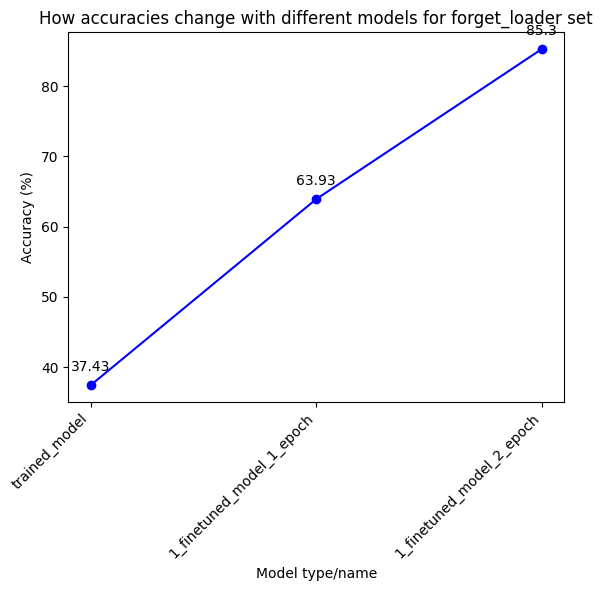

In [ ]:
# accuracy_list_forget = [38, 71.03, 81.87]
accuracy_list_forget = [37.43, 63.93, 85.3]
model_name_list_forget = ['trained_model', '1_finetuned_model_1_epoch', '1_finetuned_model_2_epoch']
plot_accuracies(accuracy_list_forget, model_name_list_forget, "forget_loader")

# Add noise to layers and finetune

### Add noise only initialy

In [ ]:
import random

def add_noise_to_layer(layer, noise_std):
    # Add Gaussian noise to the layer's weight and bias
    if hasattr(layer, 'weight') and layer.weight is not None:
        layer.weight.data += noise_std * torch.randn_like(layer.weight.data)
    if hasattr(layer, 'bias') and layer.bias is not None:
        layer.bias.data += noise_std * torch.randn_like(layer.bias.data)

# # Load the pretrained ResNet18 model
# pretrained_model = resnet18(num_classes=10)
# num_classes = 10  # FashionMNIST has 10 classes
# pretrained_model.fc = nn.Linear(pretrained_model.fc.in_features, num_classes)

# Load the pretrained model checkpoint (assuming you have it saved)
pretrained_checkpoint_path = '/content/1_finetuning_checkpoints/finetune_model_epoch_2.pth'
# pretrained_model.load_state_dict(torch.load(pretrained_checkpoint_path))

# Replace the last fully connected layer with a new one
finetune_model = resnet18(pretrained=True)
finetune_model.fc = nn.Linear(finetune_model.fc.in_features, num_classes)

# Load the pretrained checkpoint and replace the weights of the new model
finetune_model.load_state_dict(torch.load(pretrained_checkpoint_path))

# Fine-tune the model on the "retain" set with additive noise
finetune_model.to(device)

cudnn.benchmark = True  # For faster training on CUDA

num_epochs = 4  # Adjust as needed
save_interval = 1  # Save the model every `save_interval` epochs
noise_std = 0.01  # Standard deviation of the Gaussian noise

# Randomly select layers and add noise
for layer in finetune_model.children():
    if random.random() < 0.5:  # 50% chance of adding noise to the layer
        add_noise_to_layer(layer, noise_std)

for epoch in range(num_epochs):
    finetune_model.train()
    progress_bar = tqdm(retain_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False)

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = finetune_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        progress_bar.set_postfix({'Loss': loss.item()})

    # Save the model checkpoint at specified intervals
    if (epoch + 1) % save_interval == 0:
        checkpoint_path = f'/content/2_noise_initial_checkpoints/noise_initial_0.5_epoch_{epoch+1}.pth'
        torch.save(finetune_model.state_dict(), checkpoint_path)
        print(f'Model checkpoint saved at epoch {epoch+1}: {checkpoint_path}')

        # Evaluate the finetuned model on the "forget" set
        finetune_model.eval()
        eval_dataset(forget_loader, finetune_model, "Forget Set Accuracy ")
        eval_dataset(retain_loader, finetune_model, "Retain Set Accuracy ")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 96.9MB/s]


Model checkpoint saved at epoch 1: /content/2_noise_initial_checkpoints/noise_initial_0.5_epoch_1.pth
Forget Set Accuracy : 75.80%
Retain Set Accuracy : 94.41%


Model checkpoint saved at epoch 2: /content/2_noise_initial_checkpoints/noise_initial_0.5_epoch_2.pth
Forget Set Accuracy : 76.47%
Retain Set Accuracy : 94.53%


Model checkpoint saved at epoch 3: /content/2_noise_initial_checkpoints/noise_initial_0.5_epoch_3.pth
Forget Set Accuracy : 75.27%
Retain Set Accuracy : 94.46%


Model checkpoint saved at epoch 4: /content/2_noise_initial_checkpoints/noise_initial_0.5_epoch_4.pth
Forget Set Accuracy : 77.43%
Retain Set Accuracy : 94.48%


### Add noise at each step

In [ ]:
import random
from torch.utils.data import random_split
from tqdm import tqdm

def add_noise_to_layer(layer, noise_std):
    # Add Gaussian noise to the layer's weight and bias
    if hasattr(layer, 'weight') and layer.weight is not None:
        layer.weight.data += noise_std * torch.randn_like(layer.weight.data)
    if hasattr(layer, 'bias') and layer.bias is not None:
        layer.bias.data += noise_std * torch.randn_like(layer.bias.data)


# Replace the last fully connected layer with a new one
finetune_model_every_step = resnet18(pretrained=True)
finetune_model_every_step.fc = nn.Linear(finetune_model_every_step.fc.in_features, num_classes)

# Load the pretrained checkpoint and replace the weights of the new model
pretrained_checkpoint_path = '/content/1_finetuning_checkpoints/finetune_model_epoch_2.pth'
finetune_model_every_step.load_state_dict(torch.load(pretrained_checkpoint_path))

# Fine-tune the model on the "retain" set with additive noise
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(finetune_model_every_step.parameters(), lr=0.001, momentum=0.9)
finetune_model_every_step.to(device)

cudnn.benchmark = True  # For faster training on CUDA

num_epochs = 4  # Adjust as needed
save_interval = 2  # Save the model every `save_interval` epochs
noise_std = 0.01  # Standard deviation of the Gaussian noise

for epoch in range(num_epochs):
    finetune_model_every_step.train()
    progress_bar = tqdm(retain_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False)

    true_labels_list = []
    predicted_labels_list = []

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        # Randomly select layers and add noise
        for layer in finetune_model_every_step.children():
            if random.random() < 0.3:  # 50% chance of adding noise to the layer
                add_noise_to_layer(layer, noise_std)
        outputs = finetune_model_every_step(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        predicted_labels = torch.argmax(outputs, dim=1)
        true_labels_list.extend(labels.cpu().numpy())
        predicted_labels_list.extend(predicted_labels.cpu().numpy())

        progress_bar.set_postfix({'Loss': loss.item()})

    # Save the model checkpoint at specified intervals
    if (epoch + 1) % save_interval == 0:
        checkpoint_path = f'/content/2_noise_step_checkpoints/noise_step_0.2_epoch_{epoch+1}.pth'
        torch.save(finetune_model_every_step.state_dict(), checkpoint_path)
        print(f'Model checkpoint saved at epoch {epoch+1}: {checkpoint_path}')

        # true_labels_array = np.array(true_labels_list)
        # predicted_labels_array = np.array(predicted_labels_list)
        # plot_prediction_histogram(true_labels_array, predicted_labels_array, num_classes)

        # # Evaluate the finetuned model on the "forget" set
        # finetune_model_every_step.eval()
        # eval_dataset(forget_loader, finetune_model_every_step, "Forget Set Accuracy ")
        # eval_dataset(retain_loader, finetune_model_every_step, "Retain Set Accuracy ")


Model checkpoint saved at epoch 2: /content/2_noise_step_checkpoints/noise_step_0.2_epoch_2.pth


Model checkpoint saved at epoch 4: /content/2_noise_step_checkpoints/noise_step_0.2_epoch_4.pth


## Final finetuning

### Add noise initially

In [ ]:
import random



# # Load the pretrained ResNet18 model
# pretrained_model = resnet18(num_classes=10)
# num_classes = 10  # FashionMNIST has 10 classes
# pretrained_model.fc = nn.Linear(pretrained_model.fc.in_features, num_classes)

# Load the pretrained model checkpoint (assuming you have it saved)
pretrained_checkpoint_path = '/content/2_noise_initial_checkpoints/noise_initial_0.5_epoch_4.pth'
# pretrained_model.load_state_dict(torch.load(pretrained_checkpoint_path))

# Replace the last fully connected layer with a new one
finetune_model_final = resnet18(pretrained=True)
finetune_model_final.fc = nn.Linear(finetune_model_final.fc.in_features, num_classes)

# Load the pretrained checkpoint and replace the weights of the new model
finetune_model_final.load_state_dict(torch.load(pretrained_checkpoint_path))

# Fine-tune the model on the "retain" set with additive noise
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(finetune_model_final.parameters(), lr=0.001, momentum=0.9)
finetune_model_final.to(device)


cudnn.benchmark = True  # For faster training on CUDA

num_epochs = 4  # Adjust as needed
save_interval = 1  # Save the model every `save_interval` epochs

for epoch in range(num_epochs):
    finetune_model_final.train()
    progress_bar = tqdm(retain_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False)

    true_labels_list = []
    predicted_labels_list = []

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = finetune_model_final(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        predicted_labels = torch.argmax(outputs, dim=1)
        true_labels_list.extend(labels.cpu().numpy())
        predicted_labels_list.extend(predicted_labels.cpu().numpy())

        progress_bar.set_postfix({'Loss': loss.item()})

    # Save the model checkpoint at specified intervals
    if (epoch + 1) % save_interval == 0:
        checkpoint_path = f'/content/3_final_finetuning_checkpoints/finetune_final_noise_initial_epoch_{epoch+1}.pth'
        torch.save(finetune_model_final.state_dict(), checkpoint_path)
        print(f'Model checkpoint saved at epoch {epoch+1}: {checkpoint_path}')

        true_labels_array = np.array(true_labels_list)
        predicted_labels_array = np.array(predicted_labels_list)
        plot_prediction_histogram(true_labels_array, predicted_labels_array, num_classes)

        finetune_model_final.eval()
        eval_dataset(forget_loader, finetune_model_final, "Forget Set Accuracy ")
        eval_dataset(retain_loader, finetune_model_final, "Retain Set Accuracy ")


Model checkpoint saved at epoch 1: /content/3_final_finetuning_checkpoints/finetune_final_noise_initial_epoch_1.pth
Forget Set Accuracy : 86.90%
Retain Set Accuracy : 94.26%


Model checkpoint saved at epoch 2: /content/3_final_finetuning_checkpoints/finetune_final_noise_initial_epoch_2.pth
Forget Set Accuracy : 82.60%
Retain Set Accuracy : 95.25%


Model checkpoint saved at epoch 3: /content/3_final_finetuning_checkpoints/finetune_final_noise_initial_epoch_3.pth
Forget Set Accuracy : 84.60%
Retain Set Accuracy : 97.31%


Model checkpoint saved at epoch 4: /content/3_final_finetuning_checkpoints/finetune_final_noise_initial_epoch_4.pth
Forget Set Accuracy : 85.57%
Retain Set Accuracy : 97.57%


### Add noise at each step

Model checkpoint saved at epoch 5: /content/3_final_finetuning_checkpoints/finetune_final_noise_step_epoch_5.pth


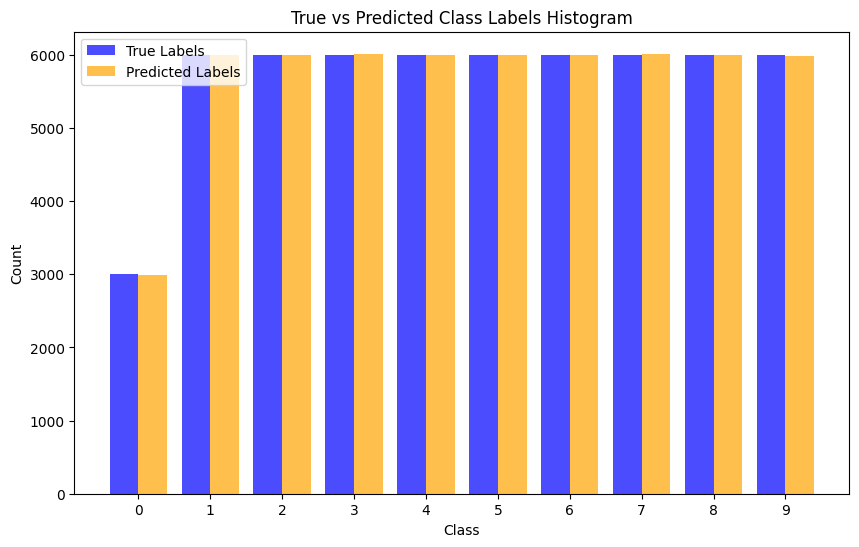

Forget Set Accuracy : 82.40%
Retain Set Accuracy : 99.83%


Model checkpoint saved at epoch 6: /content/3_final_finetuning_checkpoints/finetune_final_noise_step_epoch_6.pth


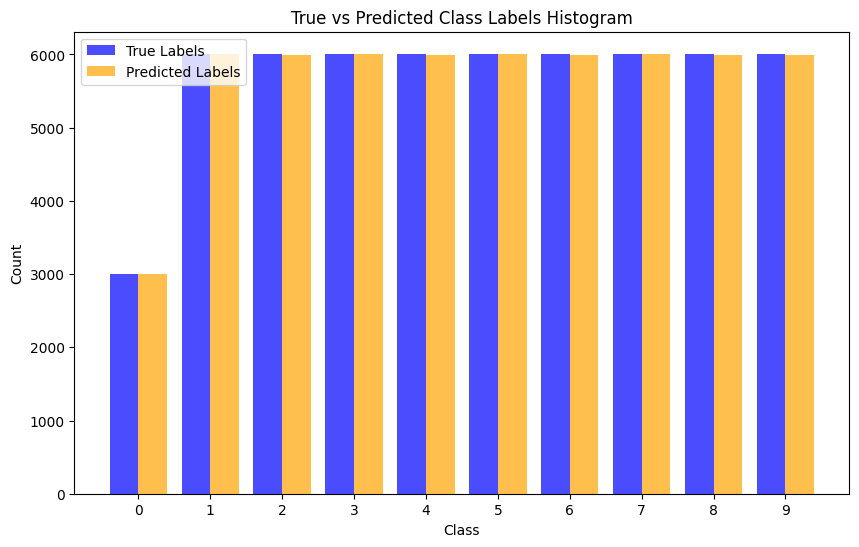

Forget Set Accuracy : 81.80%
Retain Set Accuracy : 99.93%


In [ ]:
import random
import numpy as np

num_classes=10

# # Load the pretrained ResNet18 model
# pretrained_model = resnet18(num_classes=10)
# num_classes = 10  # FashionMNIST has 10 classes
# pretrained_model.fc = nn.Linear(pretrained_model.fc.in_features, num_classes)

# Load the pretrained model checkpoint (assuming you have it saved)
pretrained_checkpoint_path = '/content/3_final_finetuning_checkpoints/finetune_final_noise_step_epoch_4.pth'
# pretrained_model.load_state_dict(torch.load(pretrained_checkpoint_path))

# Replace the last fully connected layer with a new one
finetune_model_final_noise_step = resnet18(pretrained=True)
finetune_model_final_noise_step.fc = nn.Linear(finetune_model_final_noise_step.fc.in_features, num_classes)

# Load the pretrained checkpoint and replace the weights of the new model
finetune_model_final_noise_step.load_state_dict(torch.load(pretrained_checkpoint_path))

# Fine-tune the model on the "retain" set with additive noise
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(finetune_model_final_noise_step.parameters(), lr=0.001, momentum=0.9)
finetune_model_final_noise_step.to(device)


cudnn.benchmark = True  # For faster training on CUDA

num_epochs = 2  # Adjust as needed
save_interval = 0  # Save the model every `save_interval` epochs

for epoch in range(num_epochs):
    finetune_model_final_noise_step.train()
    progress_bar = tqdm(retain_loader, desc=f'Epoch {epoch+4+1}/{num_epochs}', leave=False)

    true_labels_list = []
    predicted_labels_list = []

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = finetune_model_final_noise_step(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        predicted_labels = torch.argmax(outputs, dim=1)
        true_labels_list.extend(labels.cpu().numpy())
        predicted_labels_list.extend(predicted_labels.cpu().numpy())

        progress_bar.set_postfix({'Loss': loss.item()})

    # Save the model checkpoint at specified intervals
    if (epoch + 1) >= save_interval:
        checkpoint_path = f'/content/3_final_finetuning_checkpoints/finetune_final_noise_step_epoch_{epoch+4+1}.pth'
        torch.save(finetune_model_final_noise_step.state_dict(), checkpoint_path)
        print(f'Model checkpoint saved at epoch {epoch+4+1}: {checkpoint_path}')

        true_labels_array = np.array(true_labels_list)
        predicted_labels_array = np.array(predicted_labels_list)
        plot_prediction_histogram(true_labels_array, predicted_labels_array, num_classes)

        finetune_model_final_noise_step.eval()
        eval_dataset(forget_loader, finetune_model_final_noise_step, "Forget Set Accuracy ")
        eval_dataset(retain_loader, finetune_model_final_noise_step, "Retain Set Accuracy ")


## Evaluation of dataset wrt any checkpoint

In [ ]:
# evaluation of test set

eval_dataset(test_loader, finetune_model_final_noise_step, "Test Set Accuracy")

Test Set Accuracy: 92.29%


In [ ]:
model_path = "/content/2_noise_step_checkpoints/noise_step_0.2_epoch_2.pth"
model_to_eval = resnet18(num_classes=10)
# model_to_eval.fc = nn.Linear(model_to_eval.fc.in_features, num_classes)

# Load the pretrained checkpoint and replace the weights of the new model
model_to_eval.load_state_dict(torch.load(model_path))
model_to_eval.to(device)
eval_dataset(retain_loader, model_to_eval, "Retain Set Accuracy checkpoint 4")

Retain Set Accuracy checkpoint 4: 91.66%


In [ ]:
model_path = "/content/2_noise_step_checkpoints/noise_step_0.2_epoch_4.pth"
model_to_eval = resnet18(num_classes=10)
# model_to_eval.fc = nn.Linear(model_to_eval.fc.in_features, num_classes)

# Load the pretrained checkpoint and replace the weights of the new model
model_to_eval.load_state_dict(torch.load(model_path))
model_to_eval.to(device)
eval_dataset(retain_loader, model_to_eval, "Retain Set Accuracy checkpoint 4")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Retain Set Accuracy checkpoint 4: 94.36%


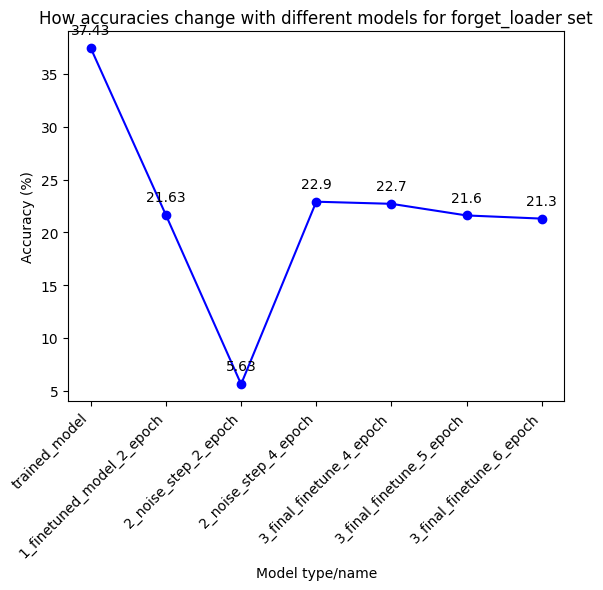

In [ ]:
# accuracy_list_forget = [38, 71.03, 81.87]
accuracy_list_forget = [37.43, 21.63, 5.63, 22.9, 22.7, 21.6, 21.3]
model_name_list_forget = ['trained_model', '1_finetuned_model_2_epoch',
                          '2_noise_step_2_epoch', '2_noise_step_4_epoch',
                          '3_final_finetune_4_epoch', '3_final_finetune_5_epoch', '3_final_finetune_6_epoch']
plot_accuracies(accuracy_list_forget, model_name_list_forget, "forget_loader")

## Comparison of true labels with predicted labels in test data

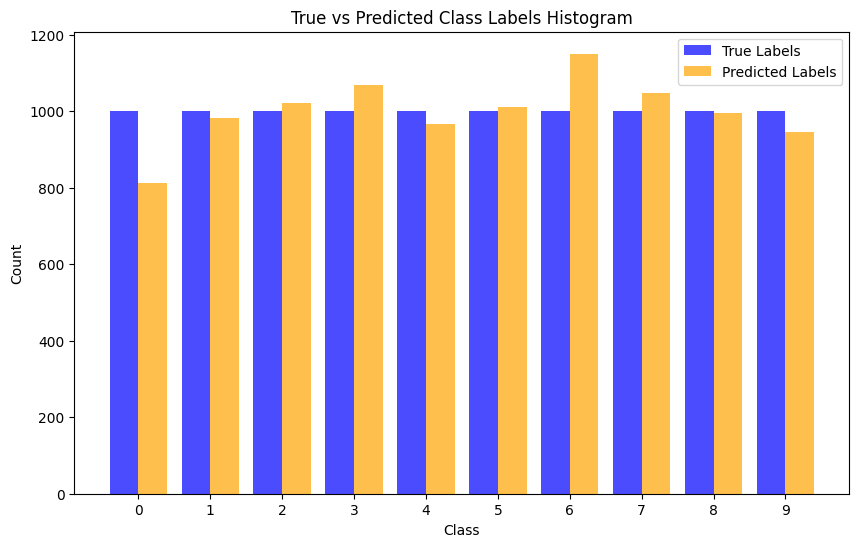

In [ ]:
true_labels_list = []
predicted_labels_list = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = finetune_model_final_noise_step(inputs)

        predicted_labels = torch.argmax(outputs, dim=1)
        true_labels_list.extend(labels.cpu().numpy())
        predicted_labels_list.extend(predicted_labels.cpu().numpy())

true_labels_array = np.array(true_labels_list)
predicted_labels_array = np.array(predicted_labels_list)
plot_prediction_histogram(true_labels_array, predicted_labels_array, num_classes)

## Variation in forget set accuracies

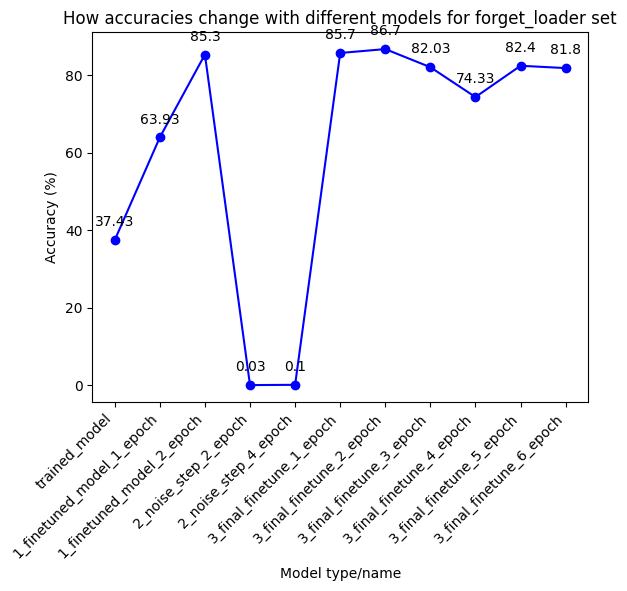

In [ ]:
# accuracy_list_forget = [38, 71.03, 81.87]
accuracy_list_forget = [37.43, 63.93, 85.3, 0.03, 0.10, 85.7, 86.7, 82.03, 74.33, 82.4, 81.80]
model_name_list_forget = ['trained_model', '1_finetuned_model_1_epoch', '1_finetuned_model_2_epoch',
                          '2_noise_step_2_epoch', '2_noise_step_4_epoch', '3_final_finetune_1_epoch',
                          '3_final_finetune_2_epoch', '3_final_finetune_3_epoch',
                          '3_final_finetune_4_epoch', '3_final_finetune_5_epoch', '3_final_finetune_6_epoch']
plot_accuracies(accuracy_list_forget, model_name_list_forget, "forget_loader")

## Variation in Retain set accuracies

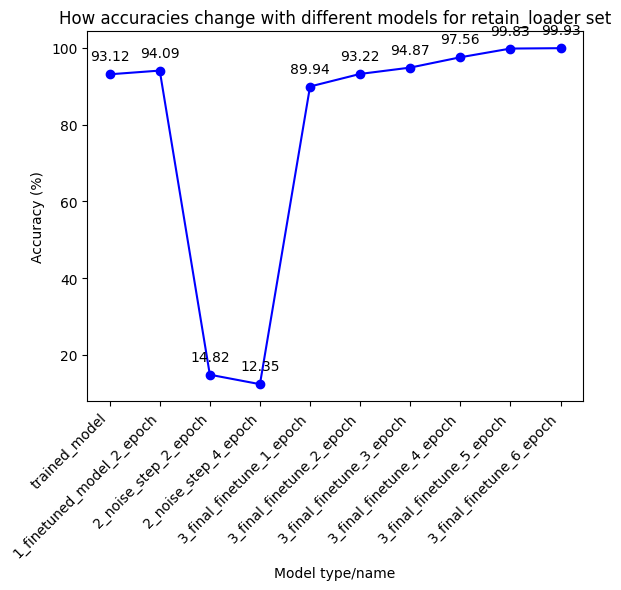

In [ ]:
# accuracy_list_retain = [38, 71.03, 81.87]
accuracy_list_retain = [93.12, 94.09, 14.82, 12.35, 89.94, 93.22, 94.87, 97.56, 99.83, 99.93]
model_name_list_retain = ['trained_model', '1_finetuned_model_2_epoch', '2_noise_step_2_epoch',
                          '2_noise_step_4_epoch', '3_final_finetune_1_epoch', '3_final_finetune_2_epoch',
                          '3_final_finetune_3_epoch', '3_final_finetune_4_epoch',
                          '3_final_finetune_5_epoch', '3_final_finetune_6_epoch']
plot_accuracies(accuracy_list_retain, model_name_list_retain, "retain_loader")

## Variation in Test Set Accuracies

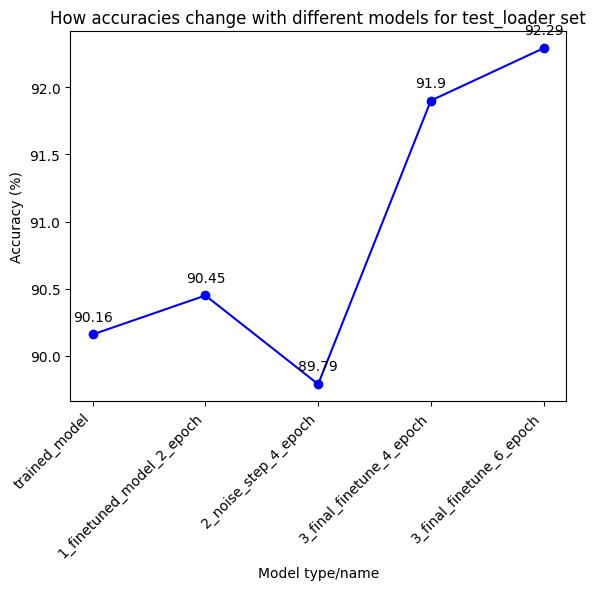

In [ ]:
# accuracy_list_test = [38, 71.03, 81.87]
accuracy_list_test = [90.16, 90.45, 89.79, 91.90, 92.29]
model_name_list_test = ['trained_model', '1_finetuned_model_2_epoch',
                          '2_noise_step_4_epoch','3_final_finetune_4_epoch',
                          '3_final_finetune_6_epoch']
plot_accuracies(accuracy_list_test, model_name_list_test, "test_loader")

# Train the model for retain set from scratch

In [ ]:

# Step 2: Load the untrained architecture of ResNet18 model
retrained_model = resnet18(pretrained=False, num_classes=10)  # FashionMNIST has 10 classes

# Step 3: Train the retrained_model from scratch on the FashionMNIST dataset train set
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(retrained_model.parameters(), lr=0.001, momentum=0.9)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
retrained_model.to(device)

cudnn.benchmark = True  # For faster training on CUDA

num_epochs = 5  # Adjust as needed

for epoch in range(num_epochs):
    retrained_model.train()
    for inputs, labels in retain_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = retrained_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# Step 4: Evaluate on the test set and get the accuracy
retrained_model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = retrained_model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Step 5: Save the retrained_model checkpoints
checkpoint_path = '/content/resnet18_fashionmnist_retrained_retain_set.pth'
torch.save(retrained_model.state_dict(), checkpoint_path)
print(f'Retrained Model checkpoints saved to {checkpoint_path}')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1/5, Loss: 0.3036956489086151
Epoch 2/5, Loss: 0.16050077974796295
Epoch 3/5, Loss: 0.32200294733047485
Epoch 4/5, Loss: 0.1538667231798172
Epoch 5/5, Loss: 0.11618468910455704
Test Accuracy: 89.98%
Retrained Model checkpoints saved to /content/resnet18_fashionmnist_retrained_retain_set.pth
